In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
met_df = pd.read_csv('kelp_data/metadata.csv')

In [3]:
met_df.head()

tile_id                filename                          md5_hash  \
0  JW725114  JW725114_satellite.tif  97b19f0747260df89e23f33caced3632   
1  UX493605  UX493605_satellite.tif  fbdd888f115ede68ee83996071c007dc   
2  OU500661  OU500661_satellite.tif  2003e7d0eaf10894e796721b5d344eeb   
3  DC227980  DC227980_satellite.tif  8498ccaff72b8d7cfcc7f9404baf36f2   
4  SS602790  SS602790_satellite.tif  525618743f94a065158f432bd5ee2d32   

   filesize_bytes       type  in_train  
0         1105392  satellite      True  
1         1270901  satellite      True  
2         1238008  satellite      True  
3         1252483  satellite      True  
4         1535964  satellite      True

In [4]:
met_df['type'].unique()

array(['satellite', 'kelp'], dtype=object)

In [5]:
# are there the same number of kelp data points as there are satellite?
kelp_subs = met_df[met_df['type'] == 'kelp']
sat_subs = met_df[met_df['type'] == 'satellite']
len(kelp_subs), len(sat_subs)

(5635, 7061)

In [6]:
import rasterio

In [7]:
dataset = rasterio.open('kelp_data/train_satellite/AA498489_satellite.tif')

/home/ziggy/pkgman/miniconda3/envs/ml-playground/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [8]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'int32',
 2: 'int32',
 3: 'int32',
 4: 'int32',
 5: 'int32',
 6: 'int32',
 7: 'int32'}

In [9]:
dataset.shape

(350, 350)

In [10]:
ind = dataset.indexes

In [11]:
dataset.read(ind[2]).shape

(350, 350)

In [12]:
kelp= rasterio.open('kelp_data/train_kelp/AA498489_kelp.tif')

In [13]:
kelp_subset = met_df[met_df['type'] == 'kelp']

In [14]:
not_kelp = met_df[~(met_df['type'] == 'kelp')]

In [15]:
not_kelp

tile_id                filename                          md5_hash  \
0     JW725114  JW725114_satellite.tif  97b19f0747260df89e23f33caced3632   
1     UX493605  UX493605_satellite.tif  fbdd888f115ede68ee83996071c007dc   
2     OU500661  OU500661_satellite.tif  2003e7d0eaf10894e796721b5d344eeb   
3     DC227980  DC227980_satellite.tif  8498ccaff72b8d7cfcc7f9404baf36f2   
4     SS602790  SS602790_satellite.tif  525618743f94a065158f432bd5ee2d32   
...        ...                     ...                               ...   
7056  UT495238  UT495238_satellite.tif  aafe403e6e7cc8a30c489ee44fa1388b   
7057  GE987629  GE987629_satellite.tif  f9a035b4e4c63eb8ff5b2f213896729a   
7058  EN974536  EN974536_satellite.tif  42daea1acf7f6f66f68afab4d63326bb   
7059  KI806222  KI806222_satellite.tif  cde7fb1ea5a17fa3cad440c1a77b9fec   
7060  TV747704  TV747704_satellite.tif  e87f78ae70136471c3a772c72757a6e1   

      filesize_bytes       type  in_train  
0            1105392  satellite      True  
1            1270901  satellite      True  
2            1238008  satellite      True  
3            1252483  satellite      True  
4            1535964  satellite      True  
...              ...        ...       ...  
7056         1213321  satellite     False  
7057          858868  satellite     False  
7058         1232262  satellite     False  
7059         1587902  satellite     False  
7060         1087275  satellite     False  

[7061 rows x 6 columns]

In [23]:
from tqdm import tqdm
maxmins = {
    'band'+str(i): {'min': 100000,'max': -100000} 
    for i in range(1,6)
}
for _, r in tqdm(not_kelp.iterrows()):
    name = r['filename']
    if r['in_train']:
        img = rasterio.open('kelp_data/train_satellite/'+name)
    else:
        img = rasterio.open('kelp_data/test_satellite/'+name)
    for i in range(1,6):
        band_min = img.read(i)[img.read(i) > -32768].min()
        maxmins['band'+str(i)]['min'] = min(maxmins['band'+str(i)]['min'], band_min)
        band_max = img.read(i)[img.read(i) < 65535].max()
        maxmins['band'+str(i)]['max'] = max(maxmins['band'+str(i)]['max'] , band_max)
    

0it [00:00, ?it/s]/home/ziggy/pkgman/miniconda3/envs/ml-playground/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
7061it [02:09, 54.43it/s]


In [24]:
maxmins

{'band1': {'min': 4201, 'max': 65454},
 'band2': {'min': 1, 'max': 65454},
 'band3': {'min': 1, 'max': 65454},
 'band4': {'min': 1, 'max': 65454},
 'band5': {'min': 1, 'max': 65454}}

In [16]:
from pathlib import Path
empty = 0
for i, k in kelp_subset.iterrows():
    name = k['filename']
    if 
    d = rasterio.open('/home/ziggy/devel/kelp-me/kelp_data/train_kelp/'+name)
    

In [17]:
len(kelp_subset)

5635

In [18]:
empty

2109

#### Result: 2000/5635 train are entirely empty

In [ ]:
sat_in_train = (met_df['type'] == 'satellite') * (met_df['in_train'])
sat_train = met_df[sat_in_train]
len(sat_train)


Index(['tile_id', 'filename', 'md5_hash', 'filesize_bytes', 'type',
       'in_train'],
      dtype='object')

In [33]:
joined_train = kelp_subset.merge( right = sat_train, on='tile_id' , suffixes=['_kelp','_sat'])

In [49]:
centerWavelengths = [1650, 860, 650, 550, 470]

#########################################################


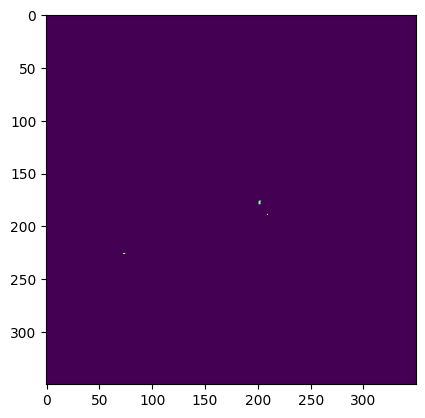

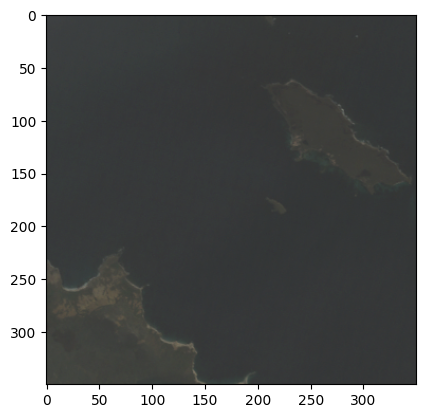

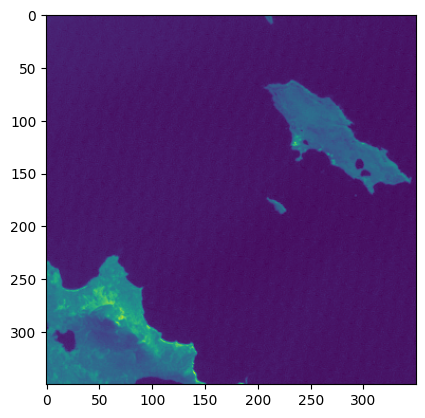

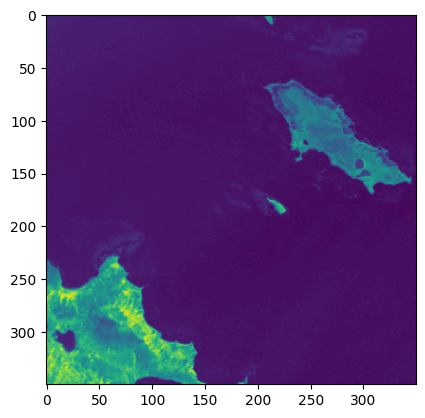

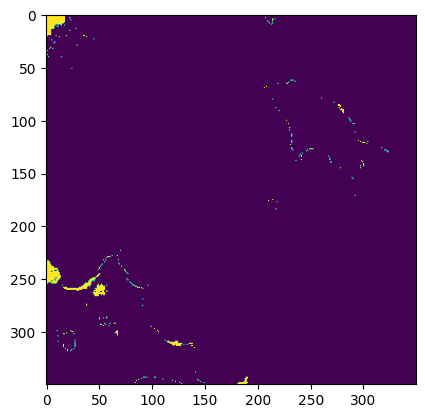

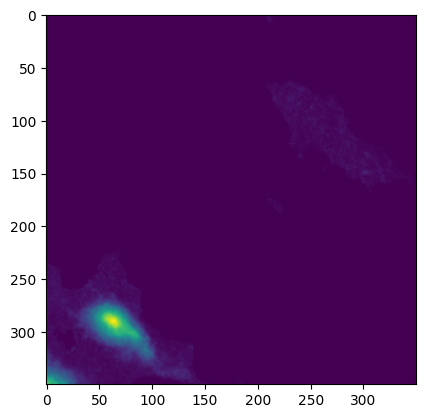

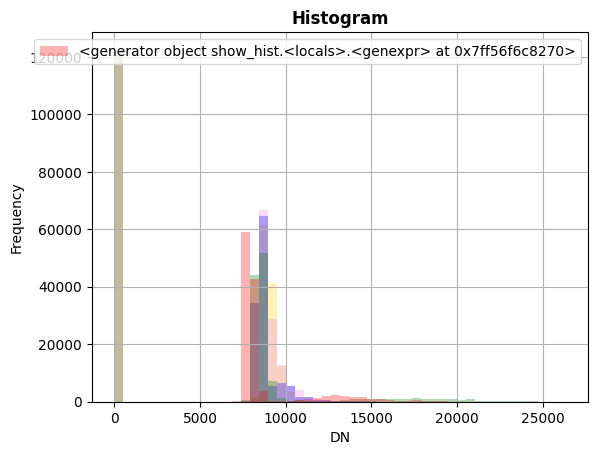

#########################################################


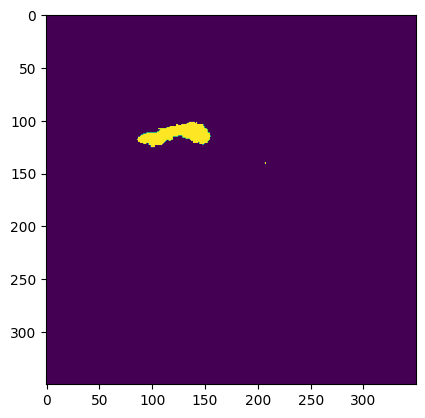

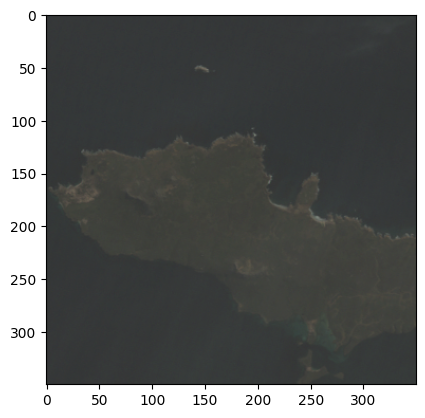

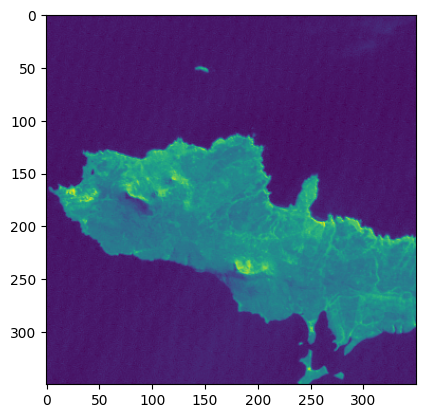

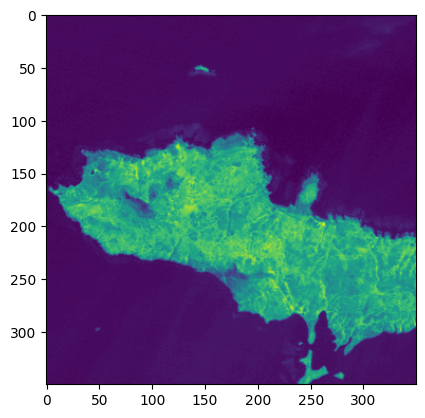

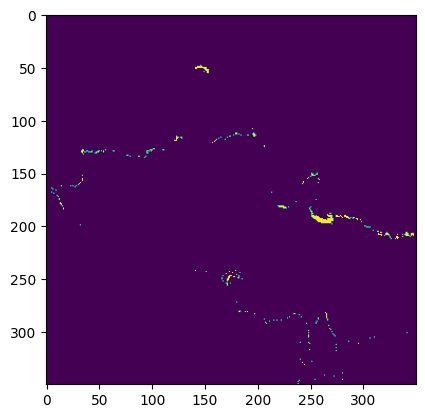

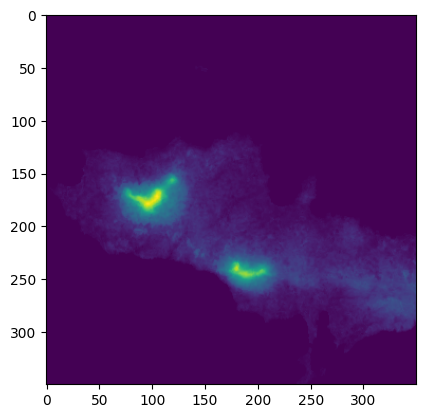

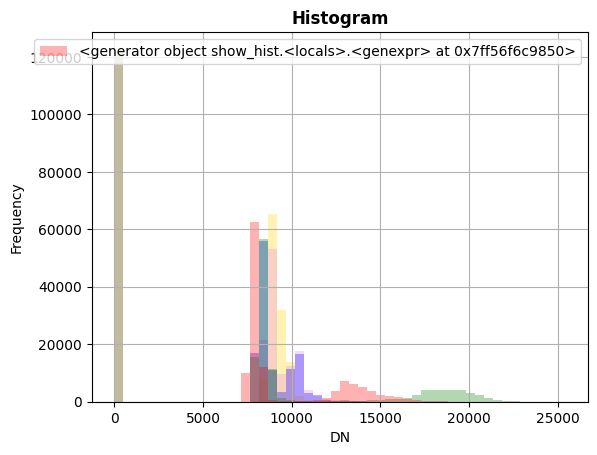

#########################################################


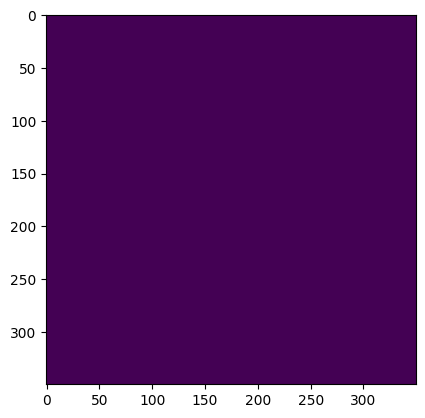

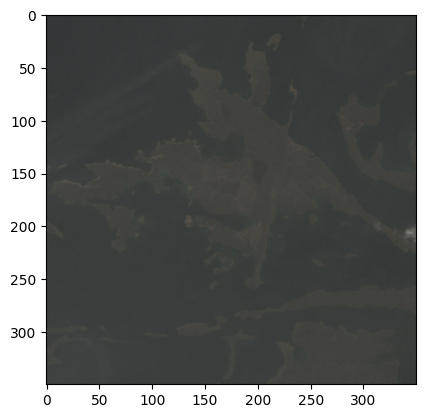

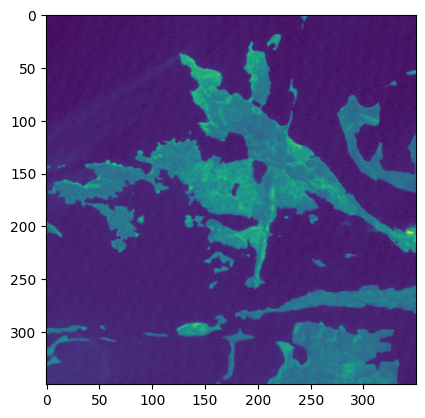

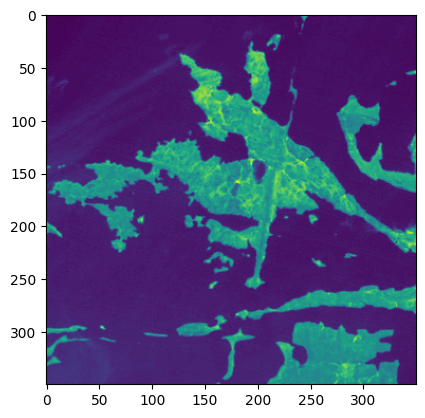

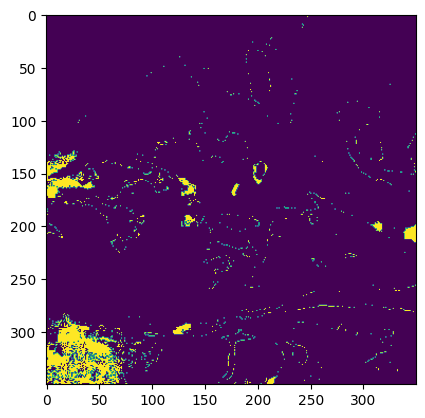

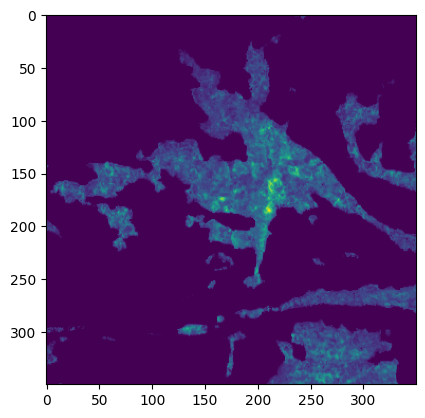

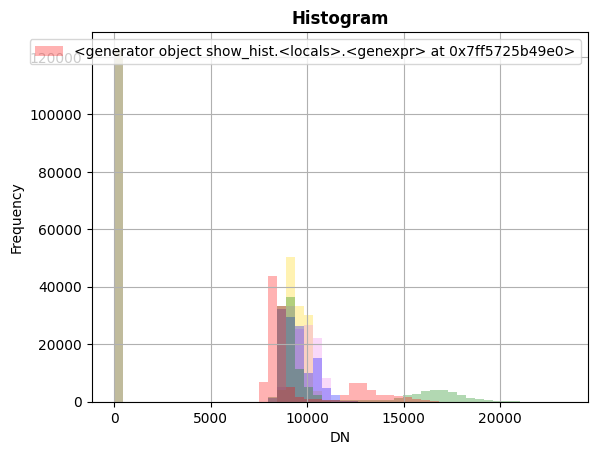

#########################################################


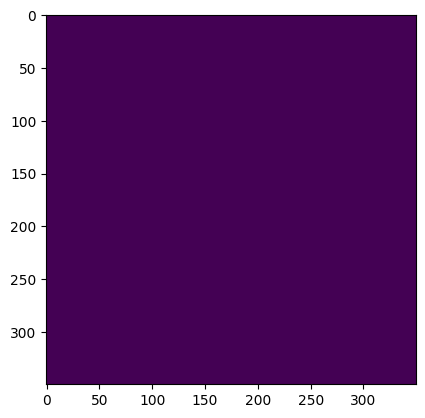

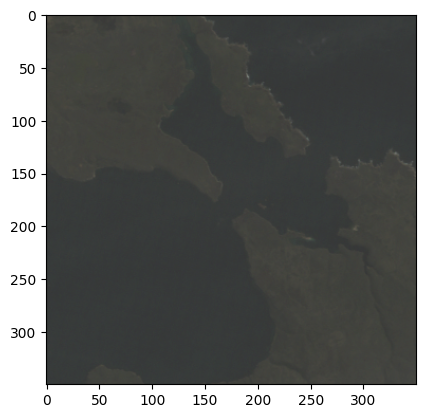

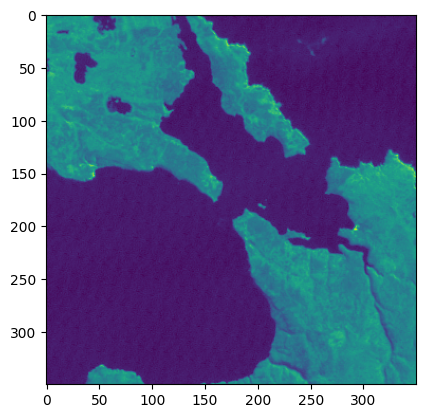

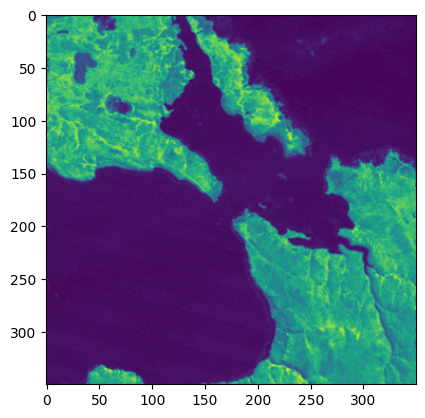

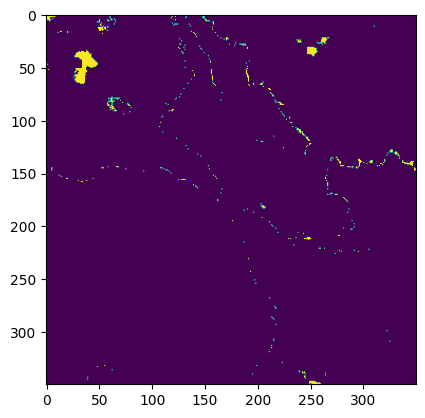

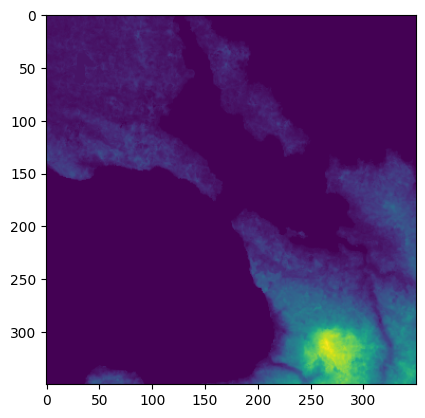

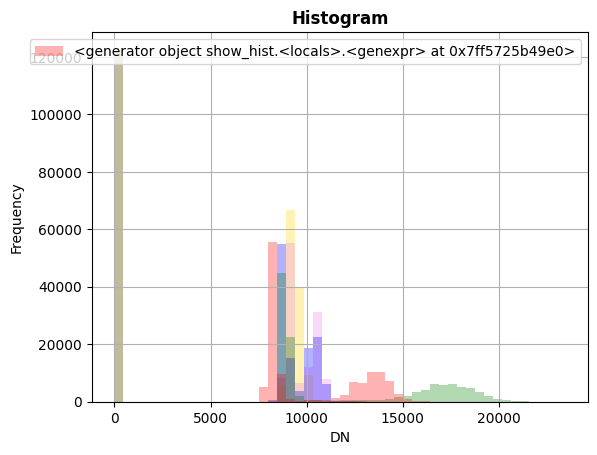

#########################################################


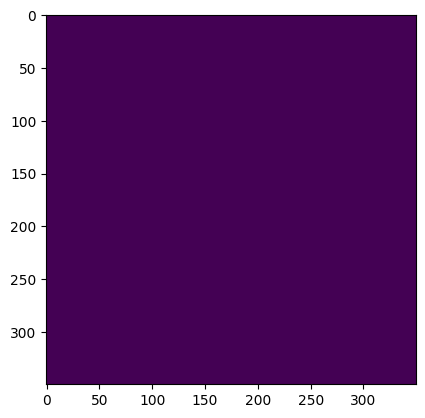

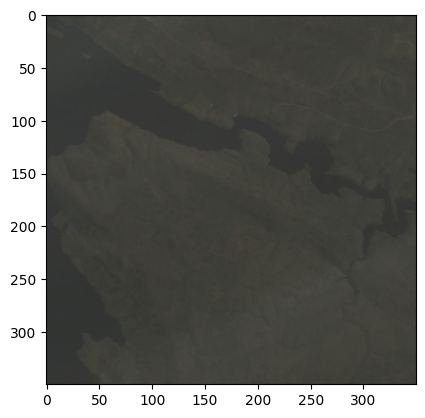

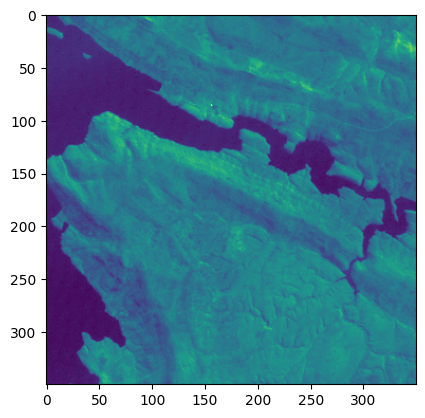

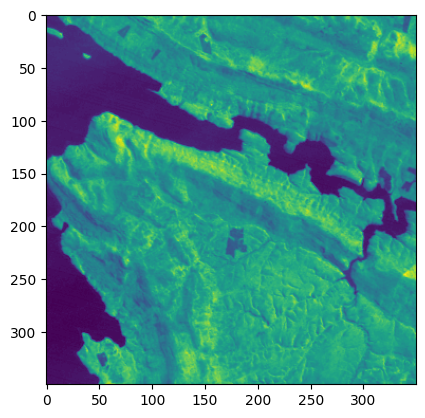

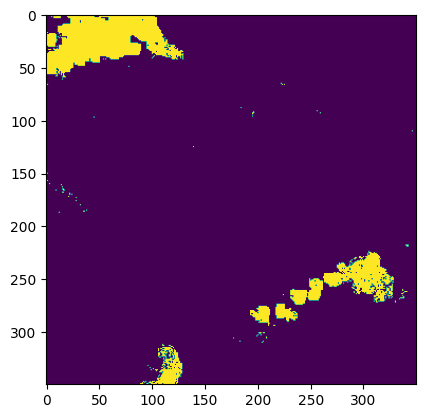

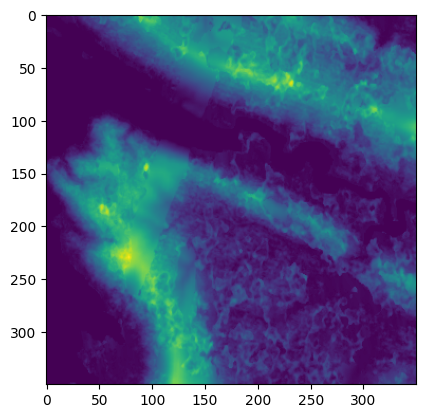

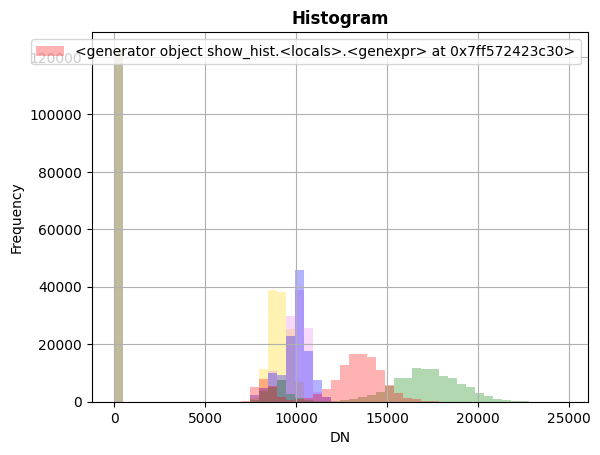

#########################################################


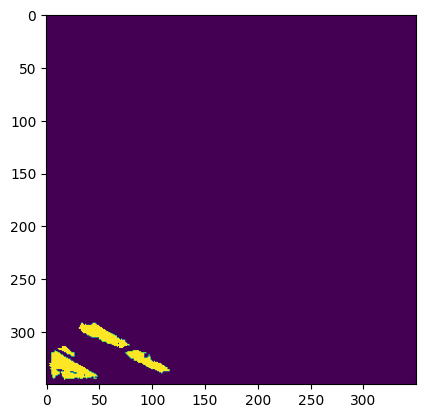

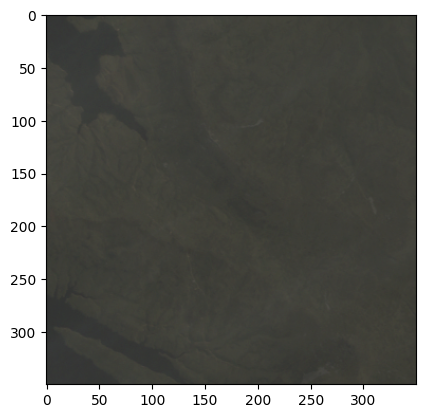

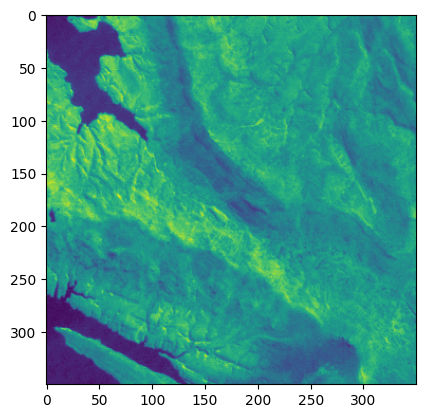

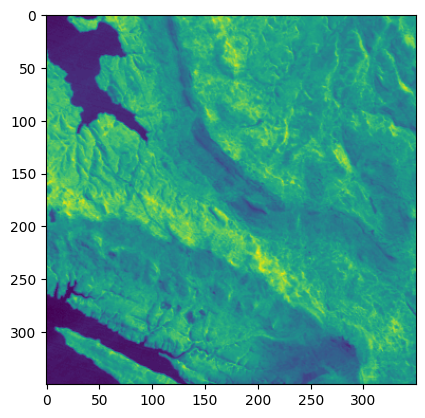

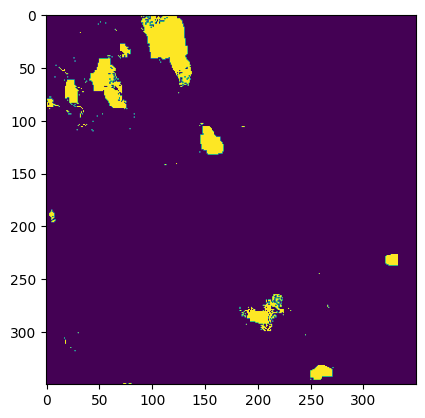

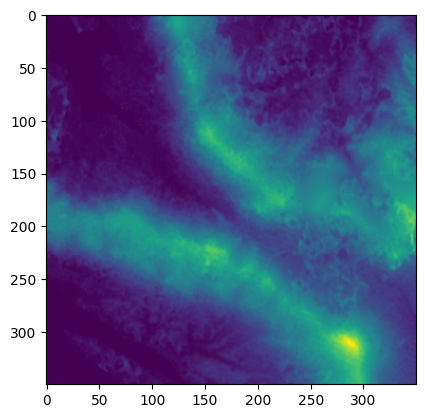

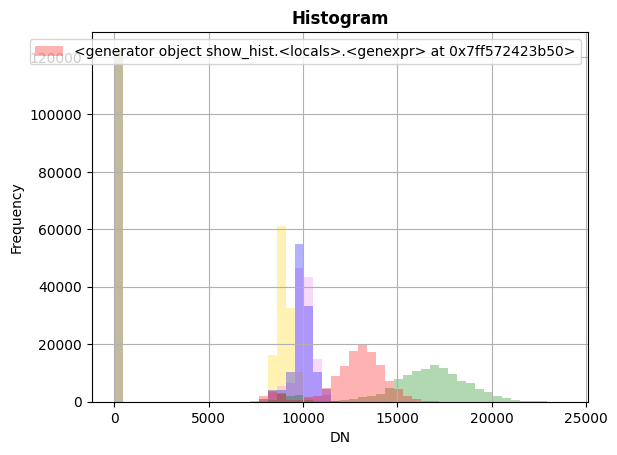

#########################################################


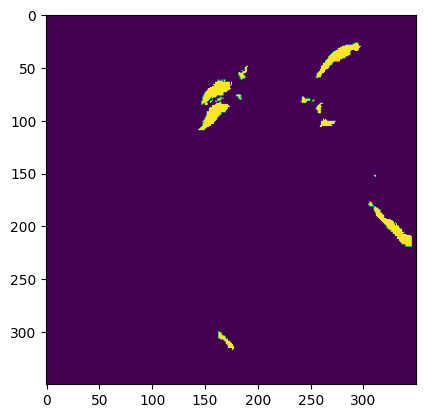

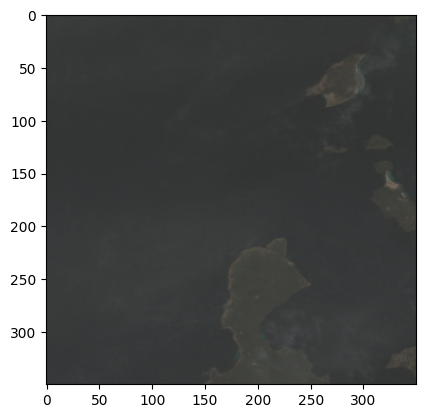

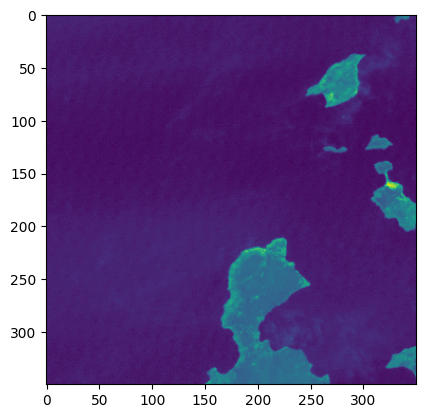

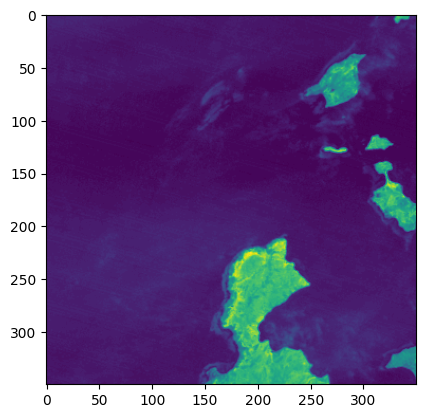

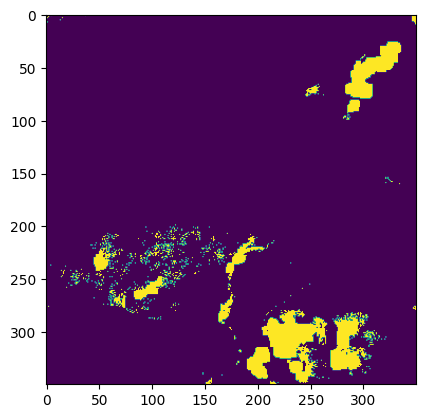

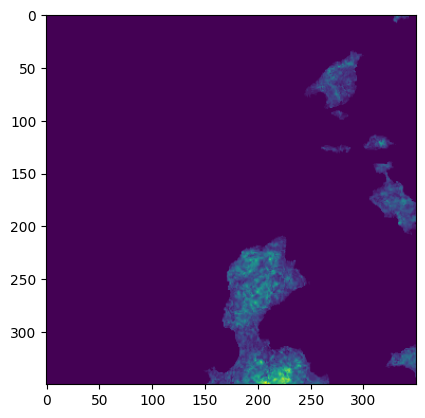

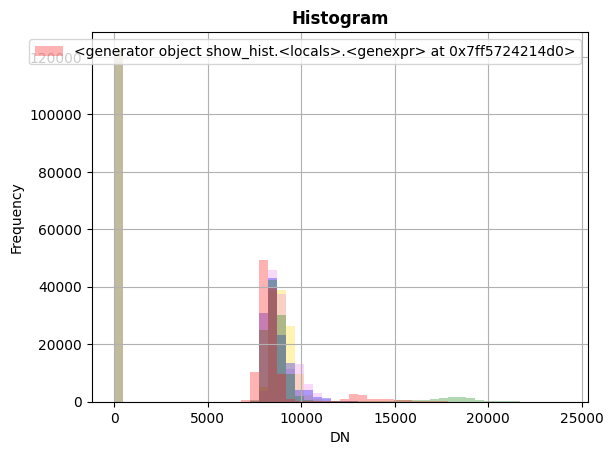

#########################################################


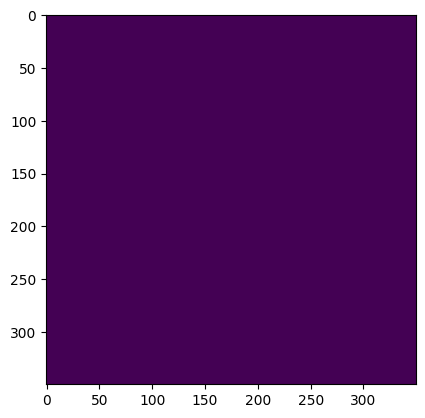

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


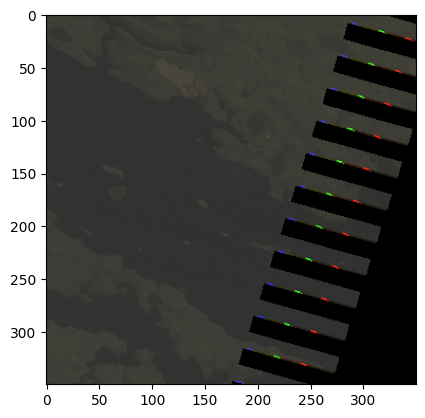

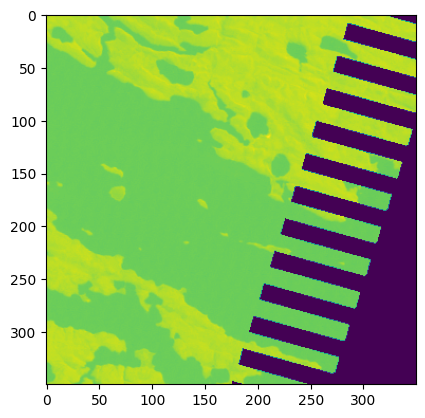

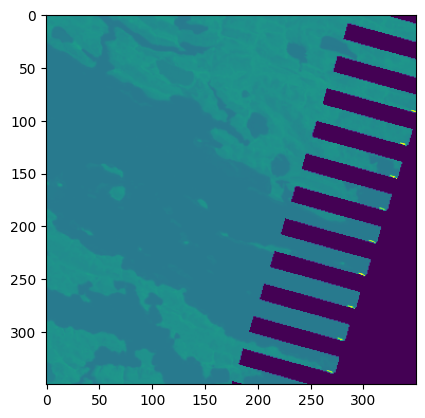

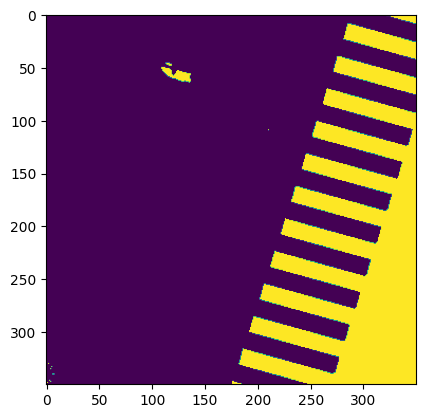

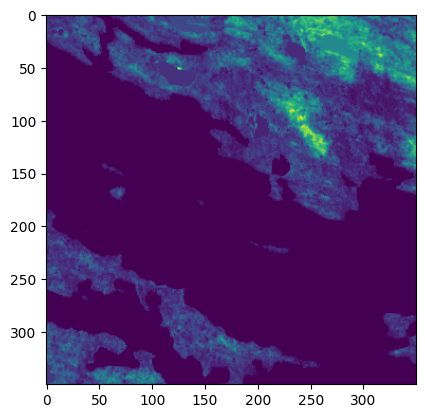

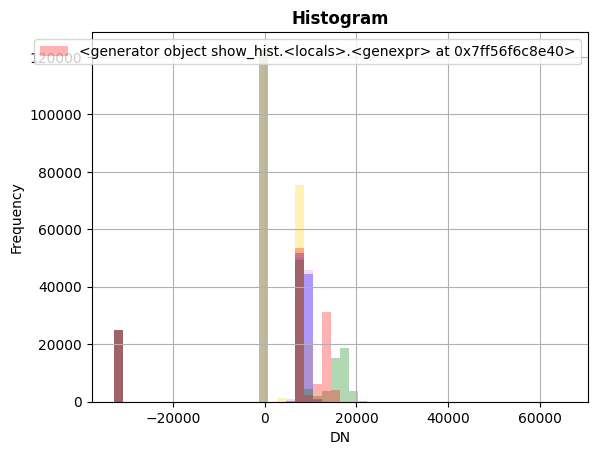

#########################################################


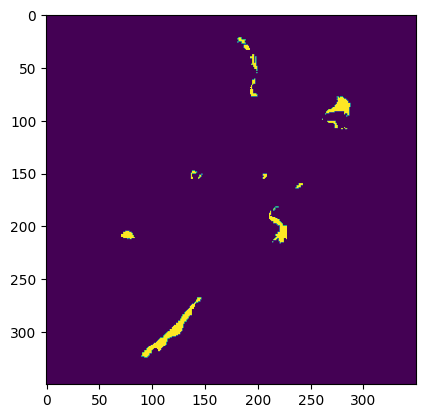

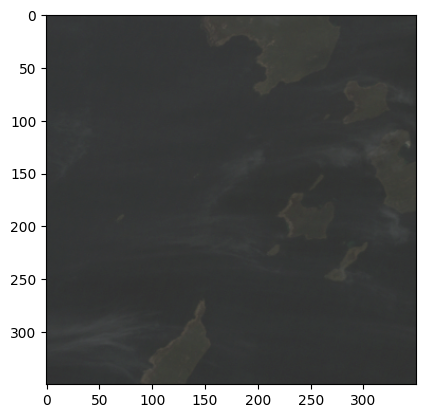

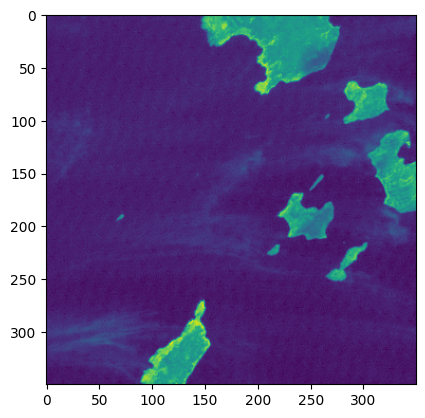

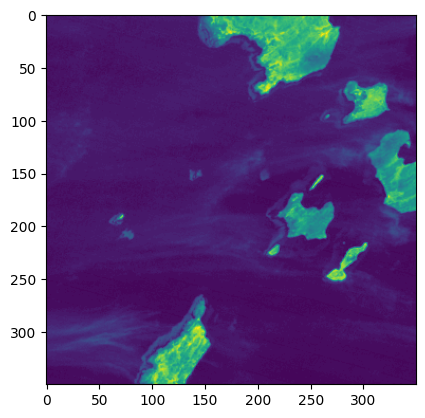

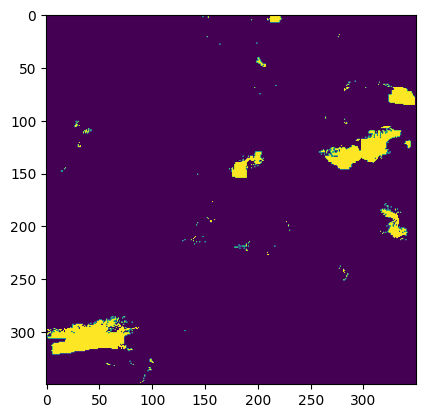

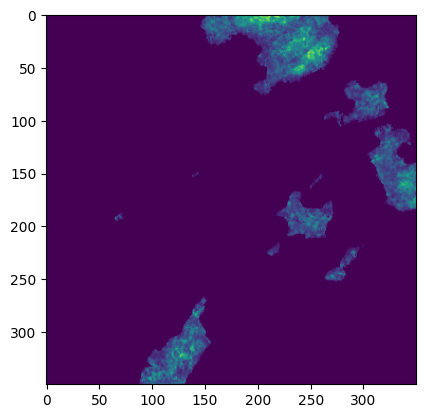

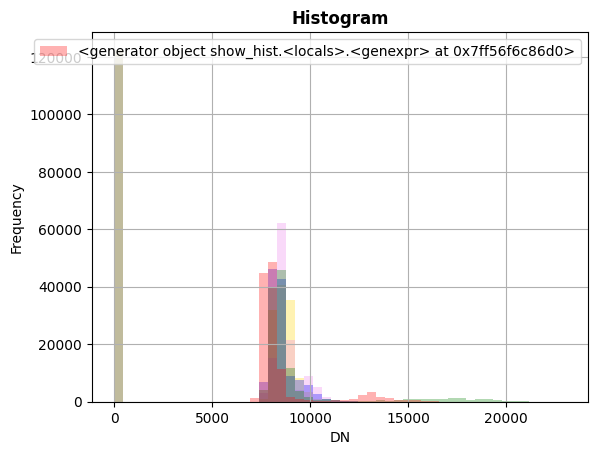

#########################################################


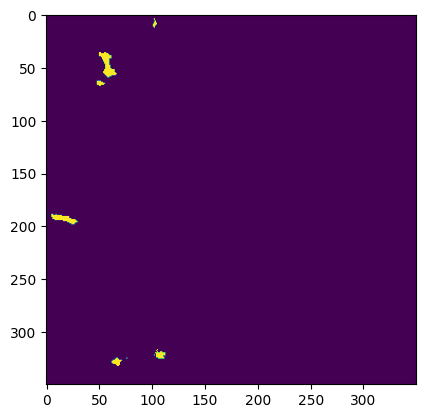

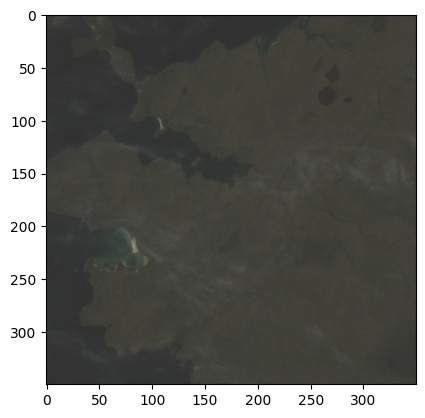

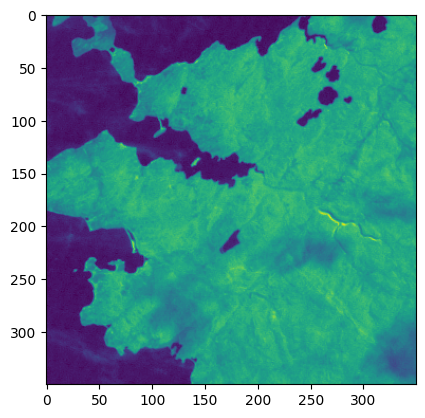

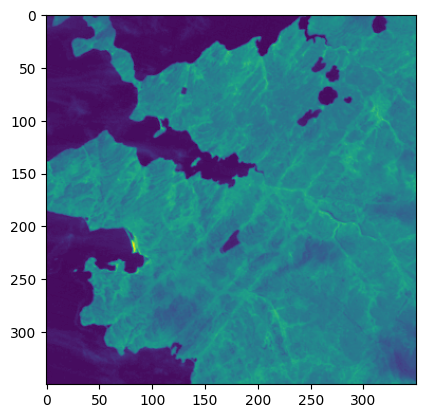

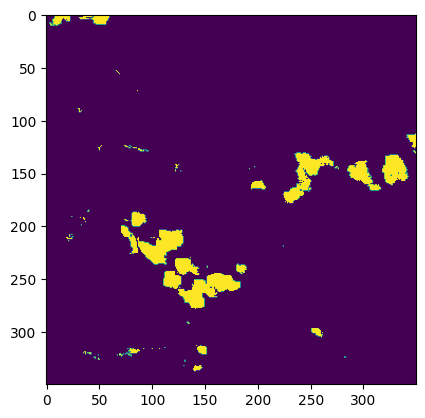

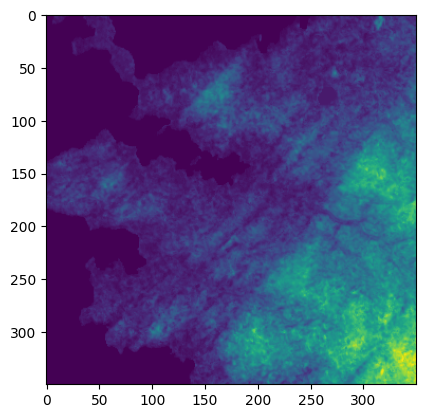

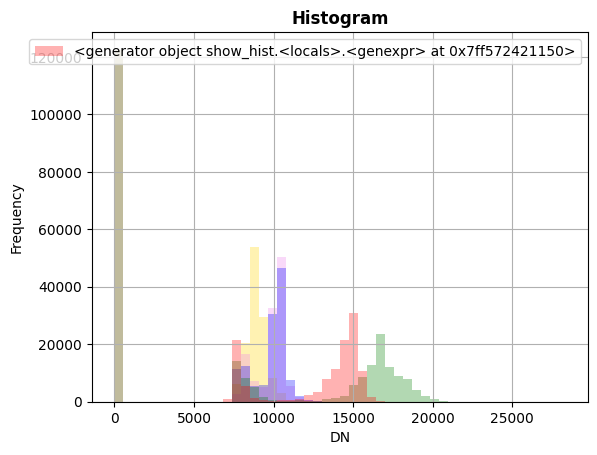

In [76]:
from rasterio.plot import show, show_hist

for i,r in joined_train[:10].iterrows():
    sat_file = rasterio.open('kelp_data/train_satellite/'+r['filename_sat'])
    kelp_file = rasterio.open('kelp_data/train_kelp/'+r['filename_kelp'])
    # for i in sat_file.indexes:
    #     show(sat_file.read(i), transform=sat_file.transform)
    max_val = 65536
    print("#########################################################")
    show(kelp_file.read(1))
    show(sat_file.read([3,4,5])/max_val)
    show(sat_file.read(1))
    show(sat_file.read(2))
    show(sat_file.read(6))
    show(sat_file.read(7))
    
    show_hist(
        sat_file.read(), bins=50, lw=0.0, stacked=False, alpha=0.3,
        histtype='stepfilled', title="Histogram")


### Data Cleaning
- remove invalid pixels (negative int)
- remove cloud mask?
- remove land?
- image augumentation using random masks, transforms, flips, scaling
- 